# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# TD1 - Introduction à Julia

Ce TD constitue une introduction au langage Julia et au calepin Jupyter. L'Exercice 1 a pour but d'introduire les commandes de base de Julia et de la librairie *Distributions.jl* tandis que l'Exercice 2 a pour but d'introduire les DataFrames et la puissante librairie *Gadfly.jl*, similaire à *ggplot2* en *R*, pour la création de graphiques.

Commençons par charger les librairies nécessaires. Si elles ne sont pas installées, vous pouvez le faire avec les commandes suivantes :

```
using Pkg
Pkg.add(["CSV", "DataFrames" ,"Distributions", "Gadfly", "Statistics"])
```

In [2]:
using CSV              # Pour charger les fichiers CSV
using DataFrames       # Pour utiliser la structure DataFrame pour stocker les données
using Distributions    # Pour utiliser les lois de probabilités classiques
using Gadfly           # Pour tracer des graphiques
using Statistics       # Pour les functions statistiques de base

# Exercice 1

Dans cet exercice, nous nous intéressons au problèmes du [collectionneur de vignettes](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_collectionneur_de_vignettes) - un problème classique en probabilités.

## Description du problème

La compagnie Kinder Surprise offre des friandises avec en bonus un jouet à l'intérieur. Le jouet fait partie d'une série de 8 jouets à collectionner. Les jouets sont disposés au hasard dans la friandise et on suppose qu'à chaque achat, les probabilités d'obtenir d'obtenir chacun des éléments de la collection sont équiprobables et indépendants.

Un collectionneur veut obtenir tous les 8 jouets de la collection. On s'intéresse au nombre d'achats requis pour compléter la collection.

## Modélisation mathématique

Soit la variable aléatoire $T$, le nombre d'achats requis pour compléter la collection de taille $n$. Posons $T_i$, le nombre d'achats requis pour obtenir le $i^e$ élément de la collection lorsque l'on a déjà $(i-1)$ éléments de la collection. On a alors que

$$ T = \sum_{i=1}^n T_i. $$

On peut montrer que

$$T_i \sim Géométrique( p_i )$$

avec 

$$p_i = \frac{n-i+1}{n}.$$


## 1.1 Simulations Monte-Carlo

Pour répondre aux questions de cet exercice, nous utiliserons une procédure Monte-Carlo qui consiste à simuler plusieurs réalisations de $T$ pour estimer les quantités d'intérêts.

Voici les différentes étapes de la procédure Monte-Carlo :
1. Simulation du nombre d'essais requis pour obtenir la $i^e$ nouvel item de la collection.
2. Simulation du nombre d'essais requis pour obtenir la collection complète.




Voici les différentes étapes qui nous permettrons d'étudier le problème :

1. Simulation du nombre d'essais requis pour obtenir la $i^e$ nouvel item de la collection.
2. Simulation du nombre d'essais requis pour obtenir la collection complète.
3. Affichage du nombre d'essais requis pour 10 000 essais afin d'obtenir la collection complète.
4. Estimation de la moyenne du nombre d'essais requis pour obtenir la collection complète.
5. Estimation de la probabilité que 100 essais soit suffisants pour obtenir la collection complète.

### 1.1.1. Simulation du nombre d'essais requis pour obtenir le $i^e$ nouvel item

Générez une réalisation possible du nombre d'essais requis pour obtenir le $i^e$ nouvel item d'une collection de $n$ éléments.

Utilisez le constructeur `Geometric()` pour construire un objet de type loi géométrique pour ensuite utiliser la fonction `rand()`sur cet objet pour générer une réalisation.

In [22]:
n = 8 # Nombre d'éléments de la collection
i = 7
a = Geometric((n+1-i)/n) # = (1/n) * (1 - 1/n)^(i-1) # Loi géométrique
# générer une réalisation en utilisant la fonction rand
realisation = rand(a) + 1
println("Nombre d'essais : ", realisation)

Nombre d'essais : 5


Transformez le code précédent en fonction nommée *ntrial* qui prend en argument $i$ et la taille de collection $n$.

In [32]:
function ntrial(i::Int,n::Int)
   @assert 0<i<=n # Vérification de la validité de i (facultatif)
   a = Geometric((n+1-i)/n)
   res = rand(a) + 1
   return res
end
ntrial(i,n)

2

### 1.1.2. Simulation du nombre d'achats requis pour obtenir la collection complète.

Simulez le nombre d'achats nécessaires pour obtenir la collection complète en simulant chacun de $T_i$.

In [42]:
res = Int[]
for j in 1:8
    push!(res, ntrial(j,n))
end
df = DataFrame(essais = res)

Row,essais
,Int64
1,1
2,1
3,1
4,1
5,1
6,2
7,2
8,4


Transformez le code précédent en fonction nommée *ntotal* qui prend en argument la taille de la collection.

In [47]:
function ntotal(n::Int)
   @assert n>0
   total=0
   for j in 1:8
    total += ntrial(j,n)
   end
   return total
end
ntotal(n)

45

### 1.1.3. Simulation du nombre d'achats requis pour compléter la collection.

Simulez d'abord 10 000 réalisations du nombre d'achats requis pour compléter la collection. C'est comme si on répétait l'expérience de collectionner les n objets 10 000 fois.

In [63]:
T = Int64[]

for j in 1:10000
    push!(T, ntotal(n))
end
println(T)

[37, 12, 16, 19, 17, 9, 34, 18, 11, 17, 24, 18, 18, 15, 20, 14, 43, 16, 13, 19, 12, 29, 32, 11, 15, 39, 16, 10, 21, 15, 21, 28, 12, 23, 23, 23, 21, 22, 33, 22, 10, 11, 27, 12, 15, 23, 24, 18, 11, 28, 30, 9, 21, 13, 24, 21, 24, 17, 15, 15, 14, 32, 19, 23, 36, 16, 23, 20, 13, 24, 13, 15, 16, 29, 27, 16, 15, 13, 28, 14, 19, 12, 12, 22, 29, 15, 11, 23, 16, 15, 21, 22, 14, 24, 12, 13, 33, 25, 22, 22, 26, 13, 13, 16, 19, 10, 13, 23, 25, 16, 26, 29, 20, 19, 16, 20, 16, 42, 28, 12, 24, 19, 19, 13, 17, 22, 10, 13, 12, 23, 24, 17, 19, 28, 19, 24, 28, 15, 13, 19, 18, 19, 26, 19, 19, 24, 16, 13, 19, 36, 20, 23, 15, 22, 20, 12, 10, 18, 25, 27, 12, 16, 32, 22, 19, 17, 20, 19, 17, 19, 17, 25, 15, 31, 19, 16, 16, 28, 18, 18, 13, 19, 27, 25, 15, 11, 16, 14, 18, 14, 42, 28, 29, 23, 20, 19, 44, 11, 35, 30, 29, 17, 46, 23, 16, 17, 25, 25, 19, 22, 26, 19, 18, 17, 40, 36, 10, 14, 27, 30, 21, 23, 17, 26, 33, 13, 28, 17, 26, 17, 34, 20, 41, 16, 25, 22, 26, 14, 23, 16, 20, 25, 23, 14, 15, 31, 9, 17, 17, 12, 24

Affichez le nombre d'essais requis avec un histogramme à 100 classes en utilisant l'argument `Geom.histogram(bincount=100)` de la fonction `plot()` de la librairie Gadfly.

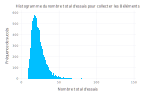

In [64]:
# https://docs.juliaplots.org/dev/series_types/histogram/
Geom.histogram(bincount=100)
plot(layer(x=T, Geom.histogram(bincount=100)), 
     Guide.xlabel("Nombre total d'essais"), 
     Guide.ylabel("Fréquence de succès"),
     Guide.title("Histogramme du nombre total d'essais pour collecter les 8 éléments"))


## 1.2 Estimation Monte-Carlo des quantités d'intérêt

On utilisera l'ensemble des réalisations simulées pour estimer les quantités d'intérêt.

### 1.2.1. Estimation de l'espérance du nombre d'achats requis pour obtenir la collection complète.

À l'aide des 10 000 réalisations, calculez la moyenne empirique de nombre d'essais requis pour obtenir la collection complète de $n=8$ éléments.

In [60]:
println(mean(T))

21.8306


### 1.2.2. Estimation de l'écart-type du nombre d'achats requis pour obtenir la collection complète.

À l'aide des 10 000 réalisations, calculez l'écart-type empirique de nombre d'essais requis pour obtenir la collection complète de $n=8$ éléments.

In [61]:
std(T)

8.80997532383154

### 1.2.2. Estimation de la probabilité que 23 essais soit suffisants pour obtenir la collection complète.

Pour ce faire, calculez la proportion empirique des réalisations parmi les 10 000 simulées où 23 essais ou moins ont été suffisants pour compléter la collection.

0.6662[17, 19, 13, 13, 17, 22, 14, 19, 14, 12, 16, 22, 23, 16, 21, 19, 19, 20, 14, 19, 13, 20, 13, 18, 18, 16, 15, 22, 19, 17, 18, 10, 13, 20, 21, 15, 14, 14, 18, 11, 23, 16, 23, 19, 15, 18, 20, 11, 20, 15, 16, 17, 13, 16, 9, 18, 11, 19, 22, 20, 23, 16, 19, 17, 14, 14, 9, 18, 14, 23, 23, 20, 17, 21, 15, 23, 16, 22, 14, 17, 9, 23, 16, 21, 16, 13, 23, 15, 23, 18, 18, 12, 14, 16, 22, 10, 17, 12, 20, 20, 17, 13, 16, 20, 23, 16, 19, 13, 15, 23, 22, 11, 22, 23, 17, 20, 14, 16, 20, 14, 13, 21, 23, 21, 11, 15, 21, 18, 20, 19, 14, 20, 20, 18, 22, 19, 12, 13, 11, 16, 10, 20, 14, 19, 17, 15, 14, 19, 17, 21, 13, 16, 11, 18, 23, 16, 21, 22, 17, 21, 12, 16, 12, 18, 16, 15, 23, 15, 9, 14, 19, 23, 17, 18, 13, 14, 13, 17, 22, 21, 14, 17, 10, 18, 19, 15, 19, 16, 18, 13, 13, 21, 17, 11, 17, 16, 15, 22, 20, 15, 15, 21, 16, 17, 17, 18, 14, 13, 12, 21, 21, 23, 11, 19, 18, 20, 23, 19, 14, 12, 14, 17, 19, 22, 12, 17, 17, 21, 22, 14, 22, 11, 18, 23, 15, 11, 11, 19, 17, 19, 22, 17, 19, 23, 14, 13, 12, 22, 17, 1

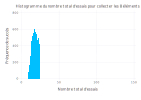

In [ ]:
K = Int64[]

for j in 1:10000
    essaie = ntotal(n)
    if essaie <= 23
        push!(K, essaie)
    end
end
println(length(K)/10000, K)

Geom.histogram(bincount=100)
plot(layer(x=K, Geom.histogram(bincount=100)), 
     Guide.xlabel("Nombre total d'essais"), 
     Guide.ylabel("Fréquence de succès"),
     Guide.title("Histogramme du nombre total d'essais pour collecter les 8 éléments"))


# Exercice 2

Dans cet exercice, vous devrez charger les données météorologiques enregistrées à l'Aéroport Pierre-Elliot-Trudeau à Montréal et afficher les températures annuelles maximales. Les étapes sont les suivantes :

1. Chargement du fichier de données.
2. Récupération des années complètes uniquement.
3. Extraction des températures annuelles maximales.
4. Affichage des températures annuelles maximales en fonction des années.


## 2.1. Chargement du fichier de données

Le chargement du fichier CSV contenant les données se fait en utilisant la fonction `CSV.read()` en ajoutant l'argument `DataFrame`.

In [145]:
data = CSV.read("meteoMontreal.csv", DataFrame)

first(data,5) # Affiche uniquement les 5 premières lignes de data

Row,x,y,STATION_NAME,STN_ID,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,PROVINCE_CODE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MEAN_TEMPERATURE,MEAN_TEMPERATURE_FLAG,MIN_TEMPERATURE,MIN_TEMPERATURE_FLAG,MAX_TEMPERATURE,MAX_TEMPERATURE_FLAG,TOTAL_PRECIPITATION,TOTAL_PRECIPITATION_FLAG,TOTAL_RAIN,TOTAL_RAIN_FLAG,TOTAL_SNOW,TOTAL_SNOW_FLAG,SNOW_ON_GROUND,SNOW_ON_GROUND_FLAG,DIRECTION_MAX_GUST,DIRECTION_MAX_GUST_FLAG,SPEED_MAX_GUST,SPEED_MAX_GUST_FLAG,COOLING_DEGREE_DAYS,COOLING_DEGREE_DAYS_FLAG,HEATING_DEGREE_DAYS,HEATING_DEGREE_DAYS_FLAG,MIN_REL_HUMIDITY,MIN_REL_HUMIDITY_FLAG,MAX_REL_HUMIDITY,MAX_REL_HUMIDITY_FLAG
,Float64,Float64,String,Int64,Int64,String31,String31,String3,Int64,Int64,Int64,Float64?,String1?,Float64?,String1?,Float64?,String1?,Float64?,String1?,Float64?,String1?,Float64?,String1?,Int64?,String1?,Int64?,String1?,Int64?,String1?,Float64?,String1?,Float64?,String1?,Int64?,String1?,Int64?,String1?
1,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.1,1941-09-01 00:00:00,QC,1941,9,1,20.8,missing,13.3,missing,28.3,missing,0.0,missing,0.0,missing,0.0,missing,missing,missing,missing,missing,missing,missing,2.8,missing,0.0,missing,missing,missing,missing,missing
2,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.2,1941-09-02 00:00:00,QC,1941,9,2,15.9,missing,10.0,missing,21.7,missing,0.0,missing,0.0,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.0,missing,2.1,missing,missing,missing,missing,missing
3,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.3,1941-09-03 00:00:00,QC,1941,9,3,18.1,missing,10.0,missing,26.1,missing,0.0,missing,0.0,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.1,missing,0.0,missing,missing,missing,missing,missing
4,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.4,1941-09-04 00:00:00,QC,1941,9,4,18.1,missing,8.3,missing,27.8,missing,5.8,missing,5.8,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.1,missing,0.0,missing,missing,missing,missing,missing
5,-73.75,45.4667,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,5415,7025250,7025250.1941.9.5,1941-09-05 00:00:00,QC,1941,9,5,18.1,missing,15.6,missing,20.6,missing,21.8,missing,21.8,missing,0.0,missing,missing,missing,missing,missing,missing,missing,0.1,missing,0.0,missing,missing,missing,missing,missing


## 2.2 Sélection des colonnes d'intérêts

Sélectionnez les colonnes
- :LOCAL_YEAR
- :LOCAL_MONTH
- :LOCAL_DAY
- :MAX_TEMPERATURE

du DataFrame avec la fonction `select()` ou `select!()`.

In [146]:
select!(data, :LOCAL_YEAR, :LOCAL_MONTH, :LOCAL_DAY, :MAX_TEMPERATURE)

Row,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE
,Int64,Int64,Int64,Float64?
1,1941,9,1,28.3
2,1941,9,2,21.7
3,1941,9,3,26.1
4,1941,9,4,27.8
5,1941,9,5,20.6
6,1941,9,6,27.2
7,1941,9,7,23.3
8,1941,9,8,16.1
9,1941,9,9,17.8


## 2.3 Récupération des années complètes

Pour que les maxima annuels aient du sens, il faut qu'ils soient pris sur l'année complète. Par exemple, on ne veut pas récupérer le maximum annuel d'une année où l'été n'a pas été enregistré. Pour la station en question, il faut retirer les années 1941 et 2013 qui sont incomplètes.

Retirez du DataFrame les lignes qui correspondent aux années 1941 et 2013.

In [147]:
# remove rows between 1941 and 2013 from data
filter!(row -> row.:LOCAL_YEAR != 1940 .&& row.:LOCAL_YEAR != 2013, data)


Row,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE
,Int64,Int64,Int64,Float64?
1,1941,9,1,28.3
2,1941,9,2,21.7
3,1941,9,3,26.1
4,1941,9,4,27.8
5,1941,9,5,20.6
6,1941,9,6,27.2
7,1941,9,7,23.3
8,1941,9,8,16.1
9,1941,9,9,17.8


## 2.4 Récupération des données enregistrées

Ignorez les lignes du DataFrame qui correspondent à des températures manquantes avec la fonction `dropmissing()` ou `dropmissing!()`.

In [148]:
dropmissing!(data, :MAX_TEMPERATURE)
# https://dataframes.juliadata.org/stable/man/missing/

Row,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MAX_TEMPERATURE
,Int64,Int64,Int64,Float64
1,1941,9,1,28.3
2,1941,9,2,21.7
3,1941,9,3,26.1
4,1941,9,4,27.8
5,1941,9,5,20.6
6,1941,9,6,27.2
7,1941,9,7,23.3
8,1941,9,8,16.1
9,1941,9,9,17.8


## 2.5.  Extraction des températures maximales annuelles

Extrayez les maxima annuels de température enregistrés à Montréal. Il y a plusieurs façons de procéder. Je vous propose d'utiliser les fonctions `combine()` et `groupby()` de la librairie *DataFrame* pour manipuler aisément les données dans un DataFrame.

In [149]:
# maxima annuels de températures
year_combine = groupby(data, :LOCAL_YEAR)
max_annual = combine(year_combine, :MAX_TEMPERATURE => maximum)


Row,LOCAL_YEAR,MAX_TEMPERATURE_maximum
,Int64,Float64
1,1941,28.3
2,1942,33.3
3,1943,32.2
4,1944,35.6
5,1945,32.2
6,1946,33.9
7,1947,33.9
8,1948,34.4
9,1949,35.0


## 2.6. Affichage des températures annuelles maximales en fonction des années.

Lorsque les données à afficher sont dans un DataFrame, le traçage des graphiques est simple avec Gadfly. Il suffit de mentionner quelle colonne est le $x$ et quelle colonne est le $y$.

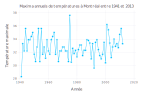

In [150]:
plot(max_annual, x=:LOCAL_YEAR, y=:MAX_TEMPERATURE_maximum, Geom.point, Geom.line,
     Guide.xlabel("Année"), 
     Guide.ylabel("Température maximale"),
     Guide.title("Maxima annuels de températures à Montréal entre 1941 et 2013"))